# 图像特效-Instagram滤镜

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [5]:
src = cv2.imread('../datas/face2.jpg')
gray = cv2.imread('../datas/face2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [3]:
def instagram_filter(src):
    lut_ab = np.array([
        64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 65, 66, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 139, 140, 142, 143, 144, 145, 146, 147, 149, 150, 151, 152, 153, 154, 156, 157, 158, 159, 160, 161, 163, 164, 165, 166, 167, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 196, 197, 198, 199, 200, 201, 203, 204, 205, 206, 207, 208, 210, 211, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212, 212 
    ])
    lut_ag = np.array([
        57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 73, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 85, 85, 86, 87, 88, 89, 90, 91, 93, 94, 95, 96, 96, 97, 98, 99, 100, 102, 103, 104, 105, 106, 107, 108, 108, 109, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 120, 122, 123, 124, 125, 126, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 142, 143, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 155, 156, 157, 158, 159, 160, 162, 163, 164, 165, 166, 167, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 202, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 214, 215, 216, 217, 218, 219, 221, 222, 223, 224, 225, 226, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 237, 238, 239, 241, 242, 243, 244, 245, 246, 247, 248, 249, 249, 251, 252, 253, 254
    ])
    lut_ar = np.array([
         81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 82, 84, 84, 85, 86, 88, 88, 89, 91, 92, 93, 93, 95, 96, 97, 98, 99, 100, 101, 103, 103, 104, 106, 107, 107, 108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 121, 122, 123, 125, 126, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 140, 140, 141, 143, 144, 145, 145, 147, 148, 149, 150, 151, 152, 154, 154, 155, 156, 158, 159, 159, 161, 162, 163, 164, 164, 165, 166, 167, 168, 169, 170, 171, 173, 173, 174, 176, 177, 178, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 191, 192, 192, 193, 195, 196, 196, 198, 199, 200, 201, 202, 203, 204, 206, 206, 207, 208, 210, 210, 211, 213, 214, 215, 215, 217, 218, 219, 220, 221, 222, 223, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225, 225
    ])
    dst = np.zeros_like(src)
    dst[:,:,0] = cv2.LUT(src[:,:,0],lut_ar)
    dst[:,:,1] = cv2.LUT(src[:,:,1],lut_ag)
    dst[:,:,2] = cv2.LUT(src[:,:,2],lut_ab)
    return dst

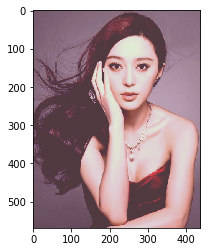

In [6]:
dst = instagram_filter(rgb)
plt.imshow(dst)